Importing Python Packages

In [1]:
#Importing python packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%pwd

'/Users/ivan/Desktop/Data Science/ads-500b/notebooks'

QUESTION 1

In [3]:
#Setting Variables for question 1
weightsFP = '../data/module3Data/weights.tsv'
POUND_KILO = 0.453592

1.1. Import the data from the file weights.tsv into a Pandas Series object in Python.
(4 points)

In [4]:
#1.1 Import TSV file Weights using Pandas package
weights = pd.read_csv(weightsFP, sep='\t', header=None)
weights.columns = ['Pounds']
weights

,Pounds
0,164
1,158
2,172
3,153
4,144
5,156
6,189
7,163
8,134
9,159


Imported using pandas read_csv() method and specified values were tab seperated (sep='\t')

1.2. Create a new series object with weights converted to kilograms from pounds (1
pound = 0.453592 kilograms). Round the results to two decimal places.
(4 points)

In [5]:
#1.2 Convert Pounds to Kilogram and round to 2 decimal places
weights['Kilograms'] = round(weights * POUND_KILO,2)
weights

,Pounds,Kilograms
0,164,74.39
1,158,71.67
2,172,78.02
3,153,69.40
4,144,65.32
5,156,70.76
6,189,85.73
7,163,73.94
8,134,60.78
9,159,72.12


1.3. Find the mean, median, and standard deviation of both series objects using
Pandas functions. (4 points)

In [6]:
#1.3 Find Mean, Median, and STD of both series objects using Numpy package
Mean = round(np.mean(weights),2)
poundsMedian = round(np.median(weights.Pounds),2)
kiloMedian = round(np.median(weights.Kilograms),2)
STD = round(np.std(weights),2)
print('Mean for Pounds: '+str(Mean['Pounds']),'\nMean for Kilograms: '+str(Mean['Kilograms']),
    '\nMedian Pounds: '+str(poundsMedian),'\nMedian Kilograms: '+str(kiloMedian),'\nSTD Pounds '+str(STD['Pounds']),
    '\nSTD Kilograms: '+str(STD['Kilograms']))

Mean for Pounds: 161.6 
Mean for Kilograms: 73.3 
Median Pounds: 160.5 
Median Kilograms: 72.8 
STD Pounds 15.06 
STD Kilograms: 6.83


1.4. Plot a histogram of weight (in kilograms) using matplotlib library with 10 bins.
(4 points)

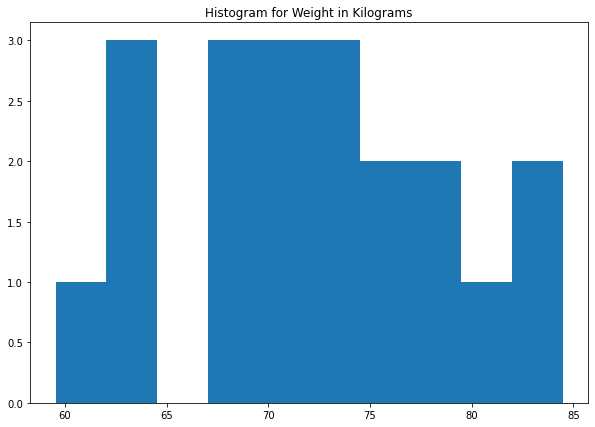

In [7]:
# 1.4 Plotting Histogram for Kilograms using matplotlib.pyplot package
plt.figure(figsize=(10,7))
hist1, edges1 = np.histogram(weights['Kilograms'], bins=10)
plt.title('Histogram for Weight in Kilograms')
plt.bar(edges1[:-1], hist1, width=edges1[1:]-edges1[:-1])
plt.show()

Used Matplot library to plot the histogram and adjusted the number of bins using (bins=10)

QUESTION 2

2.1. Import the dataset “boston.csv” into a Pandas dataframe and obtain the number
of rows and columns for the dataframe. (3 points)

In [8]:
#Setting variables
bostonFP = '../data/module3Data/boston.csv'

In [9]:
# #2.1 Import boston file using pandas and use the shape attribute
boston = pd.read_csv(bostonFP)
print(f'Number of Rows: {boston.shape[0]}\nNumber of Columns: {boston.shape[1]}')

Number of Rows: 506
Number of Columns: 13


The .shape method provides information regarding the dataframe such as number of rows and columns

2.2. What is the owner-occupied home value (MEDV) for the lowest nitric oxide
concentration (NOX) from the dataframe? (3 points)

In [10]:
#2.2 Grabbing row with lowest NOX concentration using loc, then printing out the value of MEDV column for that row
noxMinRow = boston.loc[boston['NOX'] == boston['NOX'].min()]
print(f"Owner occupied home value for lowest nitric oxide concentration is: {noxMinRow['MEDV'].values[0]}")

Owner occupied home value for lowest nitric oxide concentration is: 20.1


Grab the row with with lowest NOX value using the .min() method

2.3. Create a boxplot of per capita crime rate (CRIM) using Matplotlib. Obtain the
interquartile range for crime rate (CRIM) using Pandas functions. (4 points)

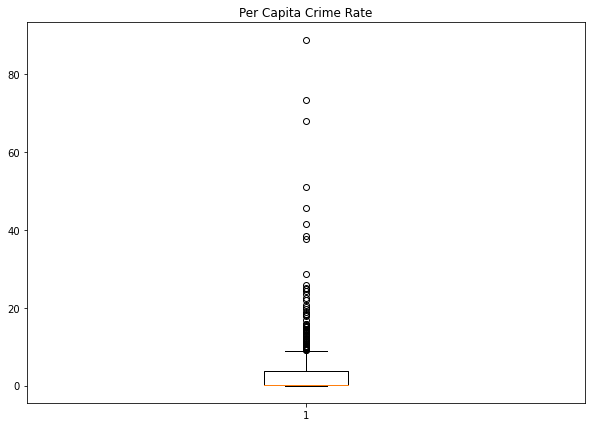

The CRIM IQR is: 3.5950375


In [11]:
#2.3 Creating boxplot using matplotlib and finding IQR using Pandas quantile attributes
plt.figure(figsize=(10,7))
plt.boxplot(boston['CRIM'])
plt.title('Per Capita Crime Rate')
plt.show()
bostonIQR = boston['CRIM'].quantile(0.75)-boston['CRIM'].quantile(0.25)
print(f'The CRIM IQR is: {bostonIQR}')

Created the boxplot and got the IQR by subtracting the 75 and 25 quantiles

2.4. Subset all columns of the dataframe for rows with outliers of crime rate into a new
dataframe. Compare the mean of AGE between the two dataframes with respect
to crime rate, what do you interpret? (Hint: Outliers exist 1.5 times of interquartile
range above third quartile and below first quartile) (4 points)

In [12]:
#2.4 Subsetting outliers and comparing mean Age
IQRdataBoston = boston['CRIM'].describe()
outlierCrimeValue = round(IQRdataBoston[6]+bostonIQR,2)
outlierBostonDf = boston[boston['CRIM'].gt(outlierCrimeValue)] 
print('bostonDF Mean Age: '+str(round(boston['AGE'].mean(),2)),"\nOutlierDF Mean Age: "+str(round(outlierBostonDf['AGE'].mean(),2)))

bostonDF Mean Age: 68.57 
OutlierDF Mean Age: 93.38


Used the describe method and got the 75% quantile value (IQRdataBoston[6]) then added the previously found IQR to get the outliers. It can be seen from the output that Outlier age is significantly higher. 

2.5. Create scatterplot between distances to employment centers (DIS) and nitric
oxide levels (NOX). Obtain correlation index between the two columns and
interpret their relation. (4 points)

<Figure size 432x288 with 0 Axes>

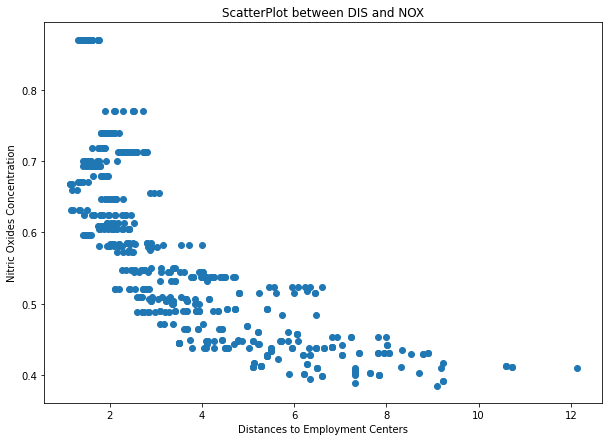

In [13]:
#2.5 Creating scatter plot for DIS & NOX
scatterFig = plt.figure()
plt.figure(figsize=(10,7))
plt.scatter(boston['DIS'],boston['NOX'])
plt.xlabel('Distances to Employment Centers')
plt.ylabel('Nitric Oxides Concentration')
plt.title('ScatterPlot between DIS and NOX')
plt.show()

In [14]:
boston.loc[:,['DIS','NOX']].corr()

,DIS,NOX
DIS,1.00000,-0.76923
NOX,-0.76923,1.00000


From the scatter plot it can be seen that there is a slight negative correlation between Distance and Nictric Oxides

2.6. Similarly, create a scatterplot between highway accessibility index (RAD) and
property tax rate (TAX). Obtain correlation index, compare it to the scatter-plot,
and interpret the relation between RAD and TAX. Take appropriate action on the
data based on your observation. (6 points)

<Figure size 432x288 with 0 Axes>

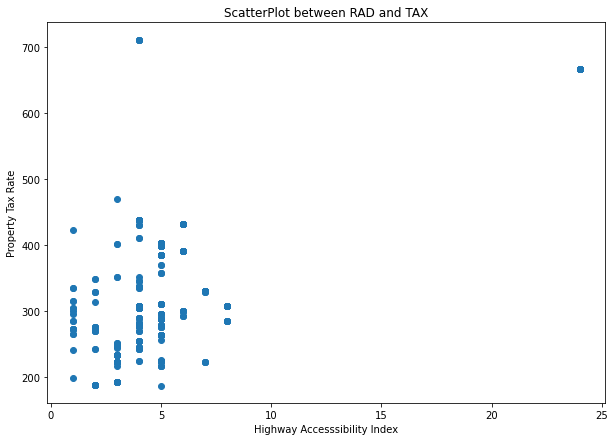

,RAD,TAX
RAD,1.000000,0.910228
TAX,0.910228,1.000000


In [15]:
#2.6 Displaying scatterplot and correlation values for RAD & TAX
scatterFig = plt.figure()
plt.figure(figsize=(10,7))
plt.scatter(boston['RAD'],boston['TAX'])
plt.xlabel('Highway Accesssibility Index')
plt.ylabel('Property Tax Rate')
plt.title('ScatterPlot between RAD and TAX')
plt.show()

boston.loc[:,['RAD','TAX']].corr()

Property Tax and Highway Accessibility have a strong positive correlation based on this scatter plot.

QUESTION 3

3.1. Calculate percentage of tip amounts for bill totals, rounded to two decimal places
and create a new column “tip_percent” in the same dataframe. (3 points)

In [16]:
#Importing tips dataset from seaborn
tips_df = sns.load_dataset('tips')
print(tips_df['smoker'].count())

244


In [17]:
#3.1 Calculated and added tip percentage column
tips_df['tip_percent'] = round(tips_df['tip']/tips_df['total_bill']*100,2)
print(tips_df)

     total_bill   tip     sex smoker   day    time  size  tip_percent
0         16.99  1.01  Female     No   Sun  Dinner     2         5.94
1         10.34  1.66    Male     No   Sun  Dinner     3        16.05
2         21.01  3.50    Male     No   Sun  Dinner     3        16.66
3         23.68  3.31    Male     No   Sun  Dinner     2        13.98
4         24.59  3.61  Female     No   Sun  Dinner     4        14.68
..          ...   ...     ...    ...   ...     ...   ...          ...
239       29.03  5.92    Male     No   Sat  Dinner     3        20.39
240       27.18  2.00  Female    Yes   Sat  Dinner     2         7.36
241       22.67  2.00    Male    Yes   Sat  Dinner     2         8.82
242       17.82  1.75    Male     No   Sat  Dinner     2         9.82
243       18.78  3.00  Female     No  Thur  Dinner     2        15.97

[244 rows x 8 columns]


3.2. For what days in the week do we have the data, and which day has the highest
bill mean? (Hint: lookup for “groupby” in pandas documentation) (3 points)

In [18]:
#3.2 Group By day to find Sunday has the highest mean bill total
round(tips_df.groupby(['day'],as_index=False)['total_bill'].mean(),2)

,day,total_bill
0,Thur,17.68
1,Fri,17.15
2,Sat,20.44
3,Sun,21.41


Used GroupBy method to find that Sunday has the highest bill mean of 21.41

3.3. Are there more dinners or lunches? Create a dataframe with this data. Are there
more smokers during lunches or dinners? Create another dataframe with this
data. Join the two dataframes by time of day and calculate the percent of
smokers at lunch and dinner. Compare the results. (6 points)

In [19]:
#3.3 Creating two dataframes and joining to compare results
groupByTimeDF = tips_df.groupby(['time'],as_index=False)['size'].sum()

subsetSmoker = tips_df[tips_df['smoker']=='Yes']

groupBySmokerDF = subsetSmoker.groupby(['time'],as_index=False)['smoker'].count()

joinedGroupBy = groupByTimeDF.join(groupBySmokerDF.set_index('time'),on='time')

joinedGroupBy['smoker_percent'] = round(joinedGroupBy['smoker']/joinedGroupBy['size']*100,2)

joinedGroupBy


,time,size,smoker,smoker_percent
0,Lunch,164,23,14.02
1,Dinner,463,70,15.12


There are more dinners than lunches, for smokers I subsetted the data to only include smokers (subsetSmoker). I then grouped the subset smoker data by time and joined both columns using the .join() method. Initally i thought smokers would have a higher percent since they account for more in the Dinner time, but when percents were calculated both Lunch and Dinner were fairly close percentage wise.   

3.4. Using the boxplot function from seaborn package, create plots on “tip” column for
Male and Female from “sex” column. Compare the boxplots and provide your
interpretation on outliers between males and females. (4 points)

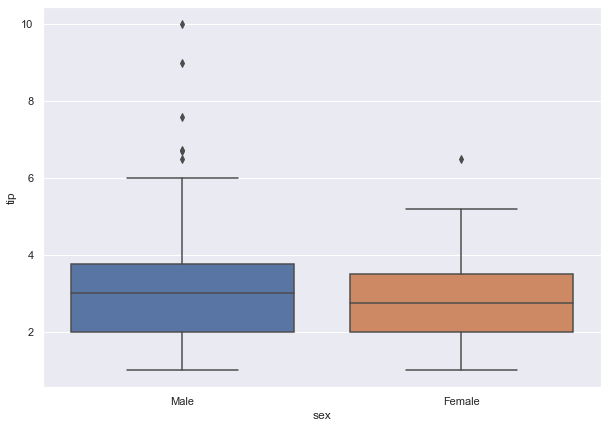

In [20]:
#3.4 Using seaborn boxplot package
sns.set(rc={'figure.figsize':(10,7)})
tipByGender = sns.boxplot(x="sex", y="tip", data=tips_df)

Based on the boxplots Males have a wider variance with a higher amount of outliers than Female tippers. 

3.5. Create the same boxplots as above for “tip_percent” and “sex”, for tip percent
below 70. Now compare the boxplots between male and female, which boxplot
has more outliers and which one is more symmetric? (4 points)

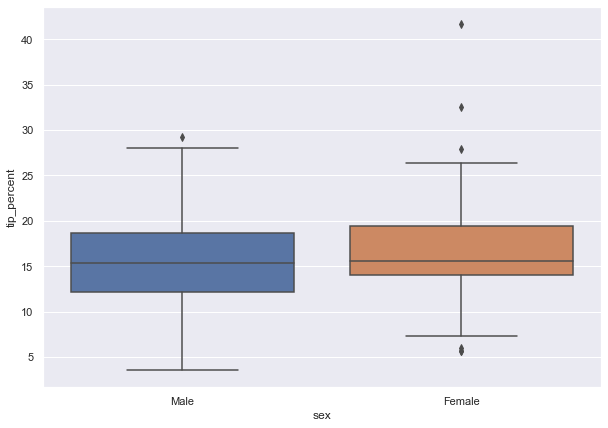

In [21]:
#3.5 Male & Female Tip Percent boxplot
sns.set(rc={'figure.figsize':(10,7)})
subsetTipPercent = tips_df[tips_df['tip_percent']<70]
tipPercentByGender = sns.boxplot(x="sex", y="tip_percent", data=subsetTipPercent)

When removing the outliers it can be seen that Females do have more outliers than Males. Additonally the removal of the outliers did create a more symmetric boxplot for the Male group. 

QUESTION 4

4.1. Import the dataset file into a Pandas dataframe and identify the count of missing
values per column. Handle missing values based on column type and explain
your reasons behind selecting appropriate techniques. (8 points)

In [22]:
#Set filepath for avocado.csv
avocadoFP = '../data/module3Data/avocado.csv'

In [23]:
#Import Avocado.csv using Pandas
avocado = pd.read_csv(avocadoFP)

In [24]:
#4.1 Displaying total amount of missing values and begin handling the missing values
avocado.isnull().sum()

Date            176
AveragePrice    184
TotalVolume     192
Small           194
Large           178
AllSizes        184
TotalBags       184
Type            204
Year            196
Region          169
dtype: int64

In [25]:
#Filling Year column by using the year contained in Date column
avocado.loc[avocado['Year'].isnull() & avocado['Date'].notnull(), 'Year'] = avocado['Date'].str[:4]
avocado.isnull().sum()

Date            176
AveragePrice    184
TotalVolume     192
Small           194
Large           178
AllSizes        184
TotalBags       184
Type            204
Year              2
Region          169
dtype: int64

In [26]:
#Filling TotalVolume using following logic --> TotalVolume = Small + Large + AllSizes + TotalBags
avocado.loc[avocado['TotalVolume'].isnull() & avocado['Small'].notnull() & avocado['Large'].notnull() & avocado['AllSizes'].notnull() 
& avocado['TotalBags'].notnull(), 'TotalVolume'] = avocado['Small'] + avocado['Large'] + avocado['AllSizes'] + avocado['TotalBags']

In [27]:
#Filling columns  by taking difference --> ex Small = TotalVolume - Large + AllSizes + TotalBags
avocado.loc[avocado['Small'].isnull() & avocado['TotalVolume'].notnull() & avocado['Large'].notnull() & avocado['AllSizes'].notnull() 
& avocado['TotalBags'].notnull(), 'Small'] = avocado['TotalVolume'] - avocado['Large'] + avocado['AllSizes'] + avocado['TotalBags']

avocado.loc[avocado['Large'].isnull() & avocado['TotalVolume'].notnull() & avocado['Small'].notnull() & avocado['AllSizes'].notnull() 
& avocado['TotalBags'].notnull(), 'Large'] = avocado['TotalVolume'] - avocado['Small'] + avocado['AllSizes'] + avocado['TotalBags']

avocado.loc[avocado['AllSizes'].isnull() & avocado['TotalVolume'].notnull() & avocado['Large'].notnull() & avocado['Small'].notnull() 
& avocado['TotalBags'].notnull(), 'AllSizes'] = avocado['TotalVolume'] - avocado['Large'] + avocado['Small'] + avocado['TotalBags']

avocado.loc[avocado['TotalBags'].isnull() & avocado['TotalVolume'].notnull() & avocado['Large'].notnull() & avocado['AllSizes'].notnull() 
& avocado['Small'].notnull(), 'TotalBags'] = avocado['TotalVolume'] - avocado['Large'] + avocado['AllSizes'] + avocado['Small']

In [28]:
#Grabbing the Mean price for avocados based on the Type
typeMean = round(avocado.groupby(['Type'])['AveragePrice'].mean(),2)
typeMean

Type
conventional    1.16
organic         1.65
Name: AveragePrice, dtype: float64

In [29]:
#Using the typeMean to fill for missing Type value depending on the current AveragePricce at that row
avocado.loc[avocado['Type'].isnull() & avocado['AveragePrice'].notnull() & avocado['AveragePrice'].ge(typeMean[1]), 'Type'] = 'organic'
avocado.loc[avocado['Type'].isnull() & avocado['AveragePrice'].notnull() & avocado['AveragePrice'].lt(typeMean[1]), 'Type'] = 'conventional'

In [30]:
#Using the category field to fill missing AveragePrice fields with the Mean for the specified category
avocado.loc[avocado['AveragePrice'].isnull() & avocado['Type'].notnull() & avocado['Type'].eq('organic'), 'AveragePrice'] = typeMean[1]
avocado.loc[avocado['AveragePrice'].isnull() & avocado['Type'].notnull() & avocado['Type'].eq('conventional'), 'AveragePrice'] = typeMean[0]

In [31]:
avocado.isnull().sum()

Date            176
AveragePrice      3
TotalVolume       7
Small             5
Large             6
AllSizes         10
TotalBags        10
Type              3
Year              2
Region          169
dtype: int64

In [32]:
#After filling as many null values the rest of the missing rows are dropped which are 365 rows or ~2% of the entire dataset
avocado = avocado.dropna()
avocado.shape[0]

17884

In [33]:
#All missing values in the dataset have now been addressed and subsetted to a new DataFrame
avocado.isnull().sum()

Date            0
AveragePrice    0
TotalVolume     0
Small           0
Large           0
AllSizes        0
TotalBags       0
Type            0
Year            0
Region          0
dtype: int64

I first filled Year by taking the Year off the Date Field for rows which had a null Year and a non null Date Field. I was then able to find that TotalVolume = Small + Large + AllSizes + TotalBags, i used this logic to fill for those columns. I then grabbed the mean average price by Type using the groupby method, and used that value as a check to fill Type depending on the Average Price. Using the Type value I then filled null Average Price fields with the mean price depending on the type. Finally I couldnt find a good way to fill for Date and Region which led me to drop all the remaining na values. A total of 365 rows were dropped that equated to ~2% of the entire dataset.

4.2. Convert the fields Type, Year and Region to categorical data type and subset the
dataframe to exclude region “TotalUS” and “West” and sort the dataframe by date
in ascending order. Is the mean price of an avocado higher in 2017 compared to
2016? (4 points)

In [34]:
#4.2 Converted Field Types and Sorted in Ascending Order by Date
avocado['Type'] = avocado['Type'].astype('category')
avocado['Year'] = avocado['Year'].astype('category')
avocado['Region'] = avocado['Region'].astype('category')
subsetRegion = avocado[(avocado['Region'] != 'West') & (avocado['Region'] != 'TotalUS')]
sortedsubsetRegion = subsetRegion.sort_values('Date')
sortedsubsetRegion

,Date,AveragePrice,TotalVolume,Small,Large,AllSizes,TotalBags,Type,Year,Region
1403,2015-01-04,1.00,162162.75,113865.83,11083.58,11699.03,25514.31,conventional,2015.0,Nashville
363,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,conventional,2015.0,California
9957,2015-01-04,1.54,61615.10,3633.93,42963.06,0.00,15018.11,organic,2015.0,GreatLakes
2027,2015-01-04,1.13,182697.97,56293.75,80396.09,9762.41,36245.72,conventional,2015.0,RichmondNorfolk
1039,2015-01-04,1.02,160130.15,4007.41,118435.79,1201.50,36485.45,conventional,2015.0,Indianapolis
...,...,...,...,...,...,...,...,...,...,...
17709,2018-03-25,1.66,15502.38,728.90,4308.74,0.00,10464.74,organic,2018.0,CincinnatiDayton
8958,2018-03-25,1.13,570446.95,135652.39,361227.57,812.10,72754.89,conventional,2018.0,Sacramento
8658,2018-03-25,1.18,4245947.20,860997.47,1144066.23,459002.28,1781881.22,conventional,2018.0,GreatLakes
17697,2018-03-25,1.65,35088.36,324.87,27550.29,0.00,7213.20,organic,2018.0,Chicago


I converted to categories using the astype() method and created a subset by removing West and TotalUS values. After removing the values i sorted by Date using the sort_values() method. 

4.3. Sum up the total volume of avocado sales by region and create a horizontal bar
plot using Matplotlib. Which state from the region has the highest sales of
avocados by volume? Subset the data for that state, create a histogram of mean
price and interpret it. Obtain the correlation index between mean price and total
volume for that state, what do you find? (6 points)

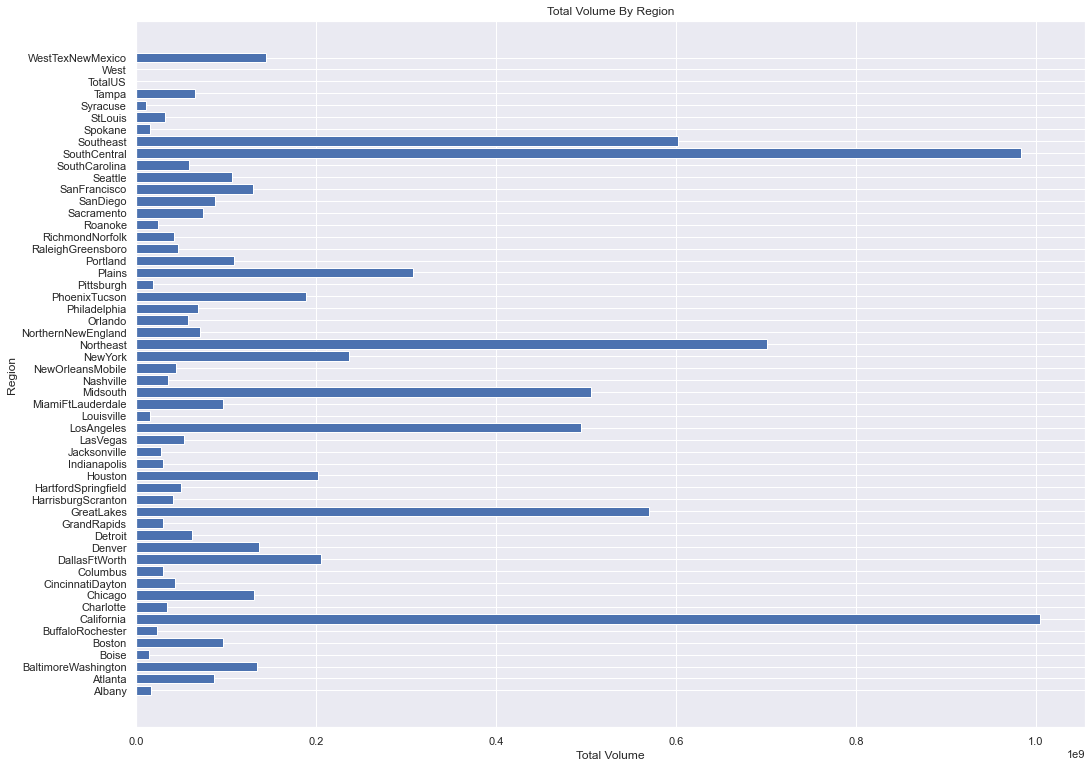

In [35]:
#4.3 Creating horizontal bar graph
totalVolumeByRegion = subsetRegion.groupby(['Region'],as_index=False)['TotalVolume'].sum()
plt.figure(figsize=(17,13))
plt.barh(totalVolumeByRegion['Region'],totalVolumeByRegion['TotalVolume'])
plt.title('Total Volume By Region')
plt.ylabel('Region')
plt.xlabel('Total Volume')
plt.show()

In [36]:
totalVolumeCali = avocado.loc[avocado['Region'] == 'California']
totalVolumeCali.corr()

,AveragePrice,TotalVolume,Small,Large,AllSizes,TotalBags
AveragePrice,1.000000,-0.790835,-0.747491,-0.755052,-0.257364,-0.653639
TotalVolume,-0.790835,1.000000,0.950093,0.950988,0.342582,0.847882
Small,-0.747491,0.950093,1.000000,0.887019,0.315320,0.701364
Large,-0.755052,0.950988,0.887019,1.000000,0.333090,0.777221
AllSizes,-0.257364,0.342582,0.315320,0.333090,1.000000,0.287722
TotalBags,-0.653639,0.847882,0.701364,0.777221,0.287722,1.000000


Surprisingly, California has the highest amount of avocado sales, but just barely beats out the South Central region. The South Central Region does contain the state of Texas which is known for their Tex-Mex food. This could contribute to the increase use of avocados in the South Central region. Additionally can be seen on the correlation index Total Volume and Average Price have a negative correlation relationship.

4.4. Provide your observations of the following timeline plot of avocado sales by
volume. Which month consistently has the highest volume of sales every year? In
general, what could be some possible reasons driving this surge in sales? (2
points)

From the graph February seems to be the month with the highest volume of avocado sales. I suspect the main factor is the Super Bowl, guacamole is an iconic side dish to many of the super bowl parties. 